# Gênero

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://github.com/lucasvitorsr/projeto-taxa-de-suicidio/blob/main/base%20de%20dados/base%20de%20dados%20limpa/dataset_limpo.csv?raw=true")

In [18]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k_pop,gdp_for_year,gdp_per_capita,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Europe


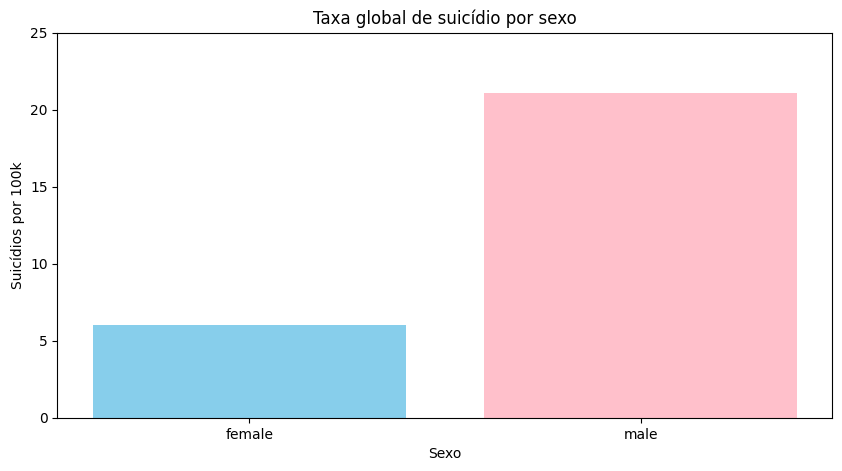

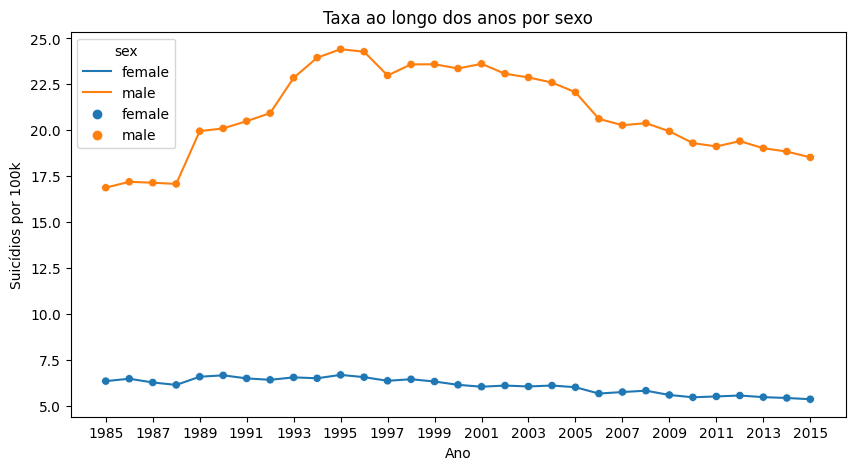

In [3]:
# Gráfico 1
df_sex = df.groupby("sex").agg({"suicides_no": "sum", "population": "sum"}).reset_index()
df_sex["suicide_per_100k"] = (df_sex["suicides_no"] / df_sex["population"]) * 100000

plt.figure(figsize=(10, 5))
plt.bar(df_sex["sex"], df_sex["suicide_per_100k"], color=["skyblue", "pink"])

plt.title("Taxa global de suicídio por sexo")
plt.xlabel("Sexo")
plt.ylabel("Suicídios por 100k")
plt.ylim(0, 25)

plt.show()

# Gráfico 2
df_sex_time = df.groupby(["year", "sex"]).agg({"suicides_no": "sum", "population": "sum"}).reset_index()
df_sex_time["suicide_per_100k"] = (df_sex_time["suicides_no"] / df_sex_time["population"]) * 100000

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sex_time, x="year", y="suicide_per_100k", hue="sex")
sns.scatterplot(data=df_sex_time, x="year", y="suicide_per_100k", hue="sex")

plt.title("Taxa ao longo dos anos por sexo")
plt.xlabel("Ano")
plt.ylabel("Suicídios por 100k")

plt.xticks(range(1985, 2016, 2))

plt.show()

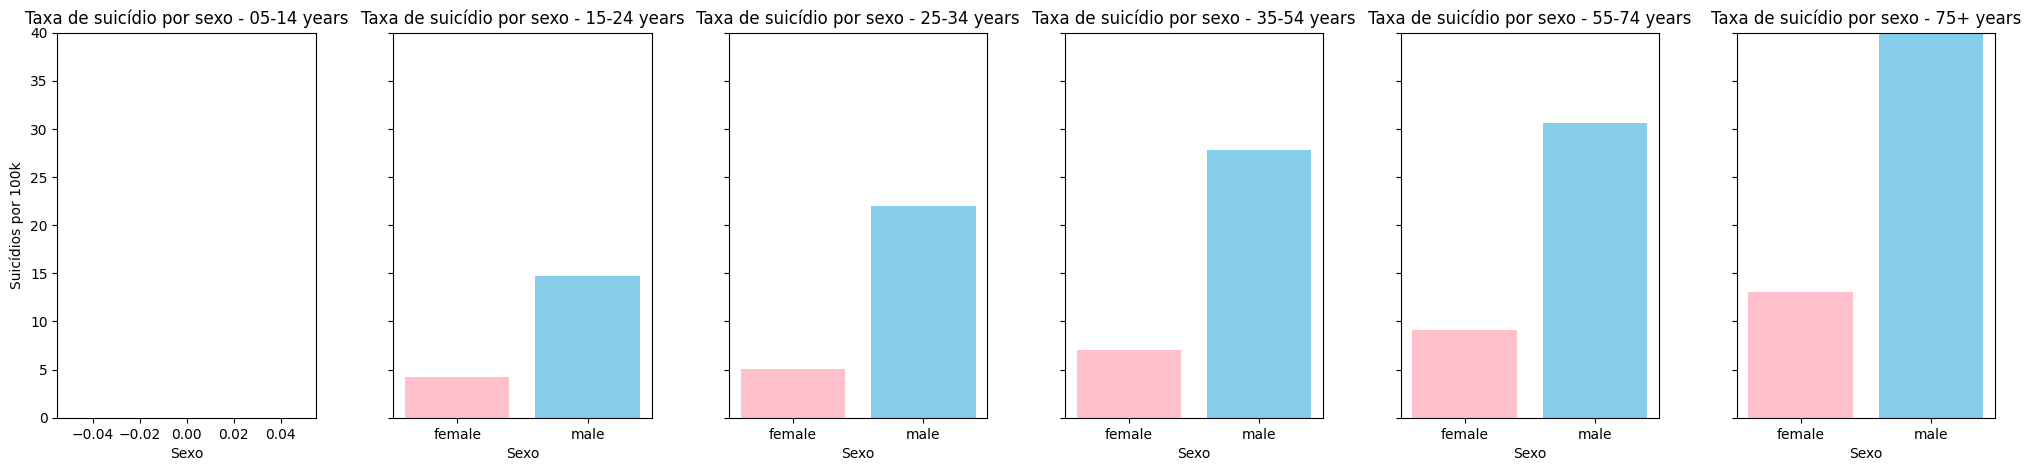

In [17]:
age_groups = ['05-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']

# Criar subplots para cada faixa etária em uma única linha
fig, axes = plt.subplots(nrows=1, ncols=len(age_groups), figsize=(25, 5), sharey=True)

# Iterar sobre as faixas etárias e criar um gráfico para cada uma delas
for i, age_group in enumerate(age_groups):
    # Filtrar os dados para a faixa etária atual
    df_age_group = df[df['age'] == age_group]

    # Calcular a taxa de suicídio por 100k para cada sexo
    df_sex = df_age_group.groupby("sex").agg({"suicides_no": "sum", "population": "sum"}).reset_index()
    df_sex["suicide_per_100k"] = (df_sex["suicides_no"] / df_sex["population"]) * 100000

    # Criar o gráfico de barras para a faixa etária atual
    axes[i].bar(df_sex["sex"], df_sex["suicide_per_100k"], color=[ "pink", "skyblue"])

    # Definir título e rótulos para o gráfico
    axes[i].set_title(f"Taxa de suicídio por sexo - {age_group}")
    axes[i].set_xlabel("Sexo")
    axes[i].set_ylim(0, 40)

# Definir título e rótulos para o eixo y compartilhado
axes[0].set_ylabel("Suicídios por 100k")

# Ajustar o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.3)

# Exibir os gráficos
plt.show()

# Teste de hipótese

**Hipótese nula**: Não há diferença entre a média da taxa de suicídios entre homens e mulheres




**Hipótese alternativa**: Há diferença significativa entre os grupos de sexo

(array([   2.,    9.,   89.,  363., 1046., 1509., 1299.,  536.,  137.,
          10.]),
 array([-1.05072157, -0.86441959, -0.67811761, -0.49181563, -0.30551365,
        -0.11921167,  0.06709031,  0.25339229,  0.43969427,  0.62599625,
         0.81229823]),
 <BarContainer object of 10 artists>)

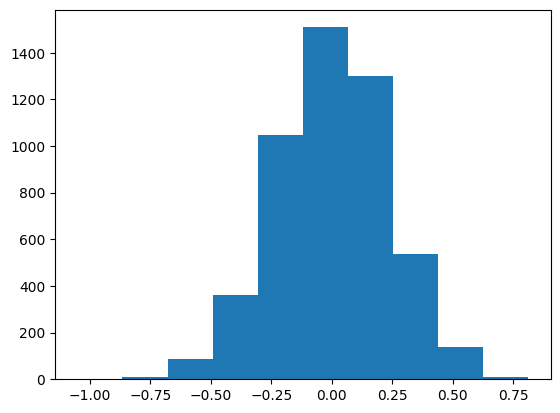

In [23]:
def t_obs(data, column = "suicides/100k_pop"):
  values = data.groupby(column).mean(numeric_only=True).values
  return values[1][0] - values[0][0]

def experimento(data, repeticao):
  diff = np.zeros(repeticao)
  for i in range(repeticao):
    aux = data.copy()
    aux["permutation"] = np.random.permutation(data["sex"].values)
    diff[i] = t_obs(aux, "permutation")

  return diff

data = df.loc[:, ["suicides/100k_pop", "sex"]]
dif = experimento(data, 5000)
plt.hist(dif)

In [35]:
values = data.groupby("sex").mean()["suicides/100k_pop"]
diferenca = values["female"] - values["male"]
print(diferenca)

-15.08356285628563


- P-valor

In [44]:
p: float = (np.abs(dif) >= np.abs(diferenca)).mean()
print(p)

0.0


Um p-valor de 0 indica que, entre as amostras geradas pelo teste de permutação, nenhuma apresentou uma diferença tão extrema quanto a diferença real observada. Isso sugere que a diferença observada é altamente improvável de ocorrer apenas por acaso, assumindo a hipótese nula. Nesse caso, isso significa que há evidências estatísticas para sugerir que existe uma diferença significativa entre as médias da taxa de suicídios entre homens e mulheres